# Question 1

# Reading Training data

In [1]:
training_data=open("training_data.txt","r").read().split()

In [2]:
N=[640000,160000,40000,10000,5000]

In [3]:
file=[training_data,training_data[:N[1]],training_data[:N[2]],training_data[:N[3]],training_data[:N[4]]]

# Calculating Frequency

In [4]:
def frequency(data):
    freq={}
    for i in data:
        if i in freq.keys():
            freq[i]+=1
        else:
            freq[i]=1
    return freq


In [5]:
freq=[]
for i in file:
    freq.append(frequency(i))

# Calculating MLE models

In [6]:
def max_L(freq,N):
    mle={}
    for w in freq.keys():
        mle[w]=freq[w]/N
    return mle

In [7]:
mle=[]
for i in range(len(N)):
    temp=max_L(freq[i],N[i])
    mle.append(temp)

# Calculating MAP models

In [8]:
def max_a_p(freq,N):
    ma={}
    for w in freq.keys():
        ma[w]=(freq[w]+2-1)/(N+20000-10000)
    return ma

In [9]:
ma=[]
for i in range(len(N)):
    temp=max_a_p(freq[i],N[i])
    ma.append(temp)

# Calculating Predictive Distributions Models

In [10]:
def pred_dist(freq,N):
    pd={}
    for w in freq.keys():
        pd[w]=(freq[w]+2)/(N+20000)
    return pd

In [11]:
pd=[]
for i in range(len(N)):
    temp=pred_dist(freq[i],N[i])
    pd.append(temp)

# Calculating Perplexity

In [12]:
import math
import numpy as np

In [13]:
def perp(model,data):
    p=0
    for i in data:
        p+=np.log(model[i])
    perp=math.exp(-p/len(data))
    return perp

In [14]:
print("The perplexity on train set of MLE model is")
for i in range(len(N)):
    print("size: ",N[i]," Perplexity is ",perp(mle[i],file[i]))

The perplexity on train set of MLE model is
size:  640000  Perplexity is  8506.43367662384
size:  160000  Perplexity is  8292.385691215124
size:  40000  Perplexity is  7478.035656314462
size:  10000  Perplexity is  5005.389219343304
size:  5000  Perplexity is  3388.2567752667333


In [15]:
print("The perplexity on train set of MAP model is")
for i in range(len(N)):
    print("size: ",N[i]," Perplexity is ",perp(ma[i],file[i]))

The perplexity on train set of MAP model is
size:  640000  Perplexity is  8506.96513236839
size:  160000  Perplexity is  8303.124332848962
size:  40000  Perplexity is  7669.433287645091
size:  10000  Perplexity is  6453.994771744834
size:  5000  Perplexity is  5915.104263875246


In [16]:
print("The perplexity on train set of Predicitive Distribution model is")
for i in range(len(N)):
    print("size: ",N[i]," Perplexity is ",perp(pd[i],file[i]))

The perplexity on train set of Predicitive Distribution model is
size:  640000  Perplexity is  8508.427803625034
size:  160000  Perplexity is  8324.246394665119
size:  40000  Perplexity is  7866.496544080013
size:  10000  Perplexity is  7230.294305050776
size:  5000  Perplexity is  7014.415012644821


# Reading Test data

In [17]:
test_data = open("test_data.txt", "r").read().split()

# Calculating Test Data Frequency

In [18]:
freq_test={}
for i in test_data:
    if i in freq_test:
        freq_test[i]=freq_test[i]+1
    else:
        freq_test[i]=1

# Testing the models

# MLE predictions

In [19]:
def test_max_L(test_data,mle,N):
    mle_prediction={}
    for w in test_data.keys():
        if w in mle.keys():
            mle_prediction[w]=mle[w]
        else:
            mle_prediction[w]=0/N
    return mle_prediction

In [20]:
test_mle=[]
for i in range(len(N)):
    temp=test_max_L(freq_test,mle[i],N[i])
    test_mle.append(temp)

# MAP Predictions

In [21]:
def test_max_a_p(test_data,ma,N):
    ma_prediction={}
    for w in test_data.keys():
        if w in ma.keys():
            ma_prediction[w]=ma[w]
        else:
            ma_prediction[w]=(0+2-1)/(N+20000-10000)
    return ma_prediction

In [22]:
test_ma=[]
for i in range(len(N)):
    temp=test_max_a_p(freq_test,ma[i],N[i])
    test_ma.append(temp)

# Predictive Distribution Predictions

In [23]:
def test_pred_dist(test_data,pd,N):
    pd_prediction={}
    for w in test_data.keys():
        if w in pd.keys():
            pd_prediction[w]=pd[w]
        else:
            pd_prediction[w]=(0+2)/(N+20000)
    return pd_prediction

In [24]:
test_pd=[]
for i in range(len(N)):
    temp=test_pred_dist(freq_test,pd[i],N[i])
    test_pd.append(temp)

# Perplexities of all predictions

In [25]:
print("The perplexity on test set of MLE model is")
for i in range(len(N)):
    print("size: ",N[i]," Perplexity is ",perp(test_mle[i],test_data))

The perplexity on test set of MLE model is
size:  640000  Perplexity is  8657.623041731129


C:\Users\aarya\AppData\Local\Temp\ipykernel_6808\3930523767.py:4: RuntimeWarning: divide by zero encountered in log
  p+=np.log(model[i])


size:  160000  Perplexity is  inf
size:  40000  Perplexity is  inf
size:  10000  Perplexity is  inf
size:  5000  Perplexity is  inf


In [26]:
print("The perplexity on test set of MAP model is")
for i in range(len(N)):
    print("size: ",N[i]," Perplexity is ",perp(test_ma[i],test_data))

The perplexity on test set of MAP model is
size:  640000  Perplexity is  8654.590090965366
size:  160000  Perplexity is  8839.546029448937
size:  40000  Perplexity is  9380.752312326787
size:  10000  Perplexity is  9992.362371992125
size:  5000  Perplexity is  10098.36492411617


In [27]:
print("The perplexity on test set of Predictive Distribution model is")
for i in range(len(N)):
    print("size: ",N[i]," Perplexity is ",perp(test_pd[i],test_data))

The perplexity on test set of Predictive Distribution model is
size:  640000  Perplexity is  8652.803792634657
size:  160000  Perplexity is  8817.904839672385
size:  40000  Perplexity is  9224.511912933269
size:  10000  Perplexity is  9668.062580182157
size:  5000  Perplexity is  9814.024919445475


# Plotting the Graphs

In [28]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [29]:
x=N
y1=[]
for i in range(len(N)):
    y1.append(perp(mle[i],file[i]))
y2=[]
for i in range(len(N)):
    y2.append(perp(ma[i],file[i]))
y3=[]
for i in range(len(N)):
    y3.append(perp(pd[i],file[i]))
y4=[]
y4.append(perp(test_mle[0],test_data))
for i in range(4):
    y4.append(20000)
y5=[]
for i in range(len(N)):
    y5.append(perp(test_ma[i],test_data))
y6=[]
for i in range(len(N)):
    y6.append(perp(test_pd[i],test_data))

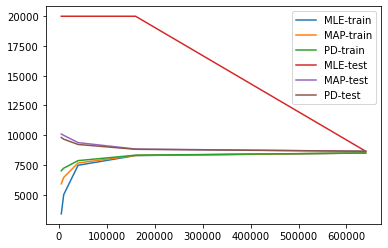

In [30]:
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)
plt.plot(x, y5)
plt.plot(x, y6)
plt.legend(["MLE-train", "MAP-train", "PD-train", "MLE-test", "MAP-test", "PD-test"])

plt.show()

# Question 2

In [31]:
training_data_size=int(len(training_data)/128)

In [32]:
print(training_data_size)

5000


In [33]:
new_training_data=training_data[:training_data_size]
trained_data=pd[4]
K=10000

# Calculating Log evidence and Perplexity of training data

In [34]:
alpha_plot=[1,2,3,4,5,6,7,8,9,10]
natural_log_plot=[]
perp_plot=[]
for a in range(1,11):
    log_second=0
    a0=a*K
    for w in freq[0]:
        try:
            log_second=log_second+math.lgamma((freq[4][w]if w in freq[4].keys()else 0)+a)
        except:
            continue
    log_evid=math.lgamma(K*a)+log_second-math.lgamma(a0+training_data_size)-K*math.lgamma(a)
    natural_log_plot.append(log_evid)
    
    task={}
    for w in freq[4].keys():
        if w in freq[4].keys():
            task[w]=(freq[4][w]+a)/(N[4]+(a*10000))
    test_task={}
    for w in freq_test.keys():
        if w in pd[4].keys():
            test_task[w]=pd[4][w]
        else:
            test_task[w]=(0+a)/(N[4]+(a*10000))
    perp_plot.append(perp(test_task,test_data))


In [35]:
print("Log evidence:")
for a in range(1,11):
    print(a,natural_log_plot[a-1])

Log evidence:
1 -46113.90994393523
2 -46016.4221833731
3 -46004.650537487054
4 -46005.47130750775
5 -46008.75036478405
6 -46012.29823476736
7 -46015.57636918465
8 -46018.47568450381
9 -46021.00839883395
10 -46023.21824466319


In [36]:
print("Perplexity")
for a in range(1,11):
    print(a,perp_plot[a-1])    

Perplexity
1 10826.772237368896
2 9814.024919445475
3 9455.9929217656
4 9272.554265719382
5 9160.984335912612
6 9085.95343431994
7 9032.033421256225
8 8991.411806092978
9 8959.708226012419
10 8934.276020578134


# Plotting the graphs

<function matplotlib.pyplot.show(close=None, block=None)>

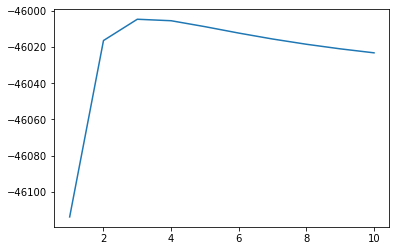

In [37]:
plt.plot(alpha_plot,natural_log_plot)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

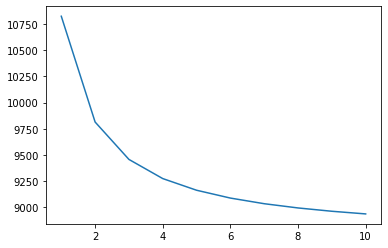

In [38]:
plt.plot(alpha_plot,perp_plot)
plt.show

# Question 3

In [39]:
file1 = open("pg121.txt.clean", "r").read().split()
file2 = open("pg141.txt.clean", "r").read().split()
file3 = open("pg1400.txt.clean", "r").read().split()
file=file1+file2+file3

In [40]:
vocab=frequency(file)
vocab1=frequency(file1)
vocab2=frequency(file2)
vocab3=frequency(file3)

In [41]:
model={}
for w in vocab1.keys():
    model[w]=(vocab1[w]+2)/(len(file1)+2*len(vocab))

In [42]:
print("Perplexity of file 1 ",perp(model,file1))

Perplexity of file 1  3345.6956693728525


In [43]:
test_file2={}
for w in file2:
    if w in model.keys():
        test_file2[w]=model[w]
    else:
        test_file2[w]=(0+2)/(len(file1)+2*len(vocab))

In [44]:
print("Perplexity of file 2 ",perp(test_file2,file2))

Perplexity of file 2  4784.495859529101


In [45]:
test_file3={}
for w in file3:
    if w in model.keys():
        test_file3[w]=model[w]
    else:
        test_file3[w]=(0+2)/(len(file1)+2*len(vocab))

In [46]:
print("Perplexity of file 3 ",perp(test_file3,file3))

Perplexity of file 3  6397.17011622876
